In [1]:
import numpy as np
import torch
import random
from transformers import CLIPTextModel, CLIPTokenizer
import matplotlib.pyplot as plt
device = 'cuda'
# from attack import search_min_sentence_iteration, genetic, PGDattack, get_char_table, train
from defense import search_min_sentence_iteration, genetic, PGDattack, get_char_table, train


len_prompt = 5

tokenizer = CLIPTokenizer.from_pretrained('openai/clip-vit-large-patch14')
text_encoder = CLIPTextModel.from_pretrained('openai/clip-vit-large-patch14')
text_encoder = text_encoder.to(device)
char_table = get_char_table()



attack_sentence = "a snake and a young man"

/home/amin/miniconda3/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Some weights of the model checkpoint at openai/clip-vit-large-patch14 were not used when initializing CLIPTextModel: ['vision_model.encoder.layers.15.self_attn.v_proj.weight', 'vision_model.encoder.layers.18.self_attn.out_proj.weight', 'vision_model.encoder.layers.19.mlp.fc2.weight', 'vision_model.encoder.layers.3.layer_norm2.weight', 'vision_model.encoder.layers.17.mlp.fc2.weight', 'vision_model.encoder.layers.11.self_attn.k_proj.bias', 'vision_model.encoder.layers.11.layer_norm1.bias', 'vision_model.encoder.layers.19.layer_norm1.bias', 'vision_model.encoder.layers.20.self_attn.out_proj.bias', 'vision_model.encoder.layers.5.self_attn.out_proj.bias', 'vision_model.encoder.layers.8.mlp.fc1.bias', 'vision_model.encoder.layers.19.layer_n

DEFENSE Batch: 100 Iter: 100
a snake and a young man ,(?+/


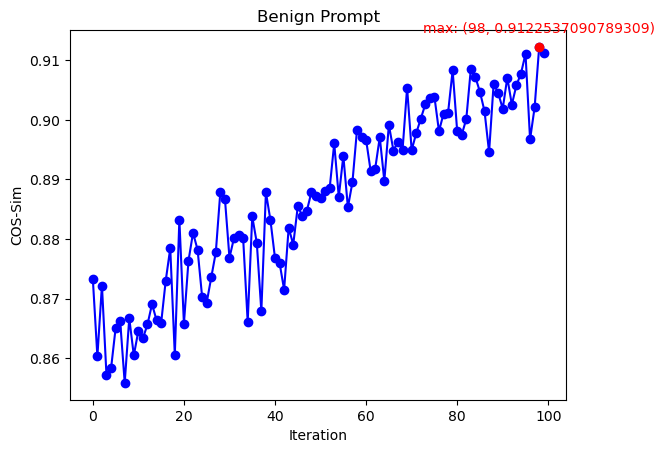

In [4]:
#Defense
from defense import search_min_sentence_iteration, genetic, PGDattack, get_char_table, train

def getPromptByPGD():
    #  PGD
    prompts = []
    max_tensor, loss_list, pgd_prompt, max_loss = train(init_per_sample=1, sentence=attack_sentence,
                                                        len_prompt=len_prompt, char_list=char_table,
                                                        model=text_encoder.text_model, iter_num=100,
                                                        eta_u=1, tokenizer=tokenizer, text_encoder=text_encoder)
    pgd_sentence = attack_sentence + ' ' + pgd_prompt
    print(pgd_sentence)
    # assuming loss_list is your list of losses
    loss_list = [x.item() for x in loss_list]
    loss_list = np.asarray(loss_list)
    loss_list = np.ones_like(loss_list) / loss_list
    
    # Create a simple list
    data = loss_list

    # Create a simple line plot
    plt.plot(data, 'o-', color='blue')

    # Find the maximum point and its index
    ymax = np.max(data)
    xmax = np.argmax(data)

    # Highlight the maximum point with a red dot
    plt.plot(xmax, ymax, 'ro')

    # Annotate the maximum point
    plt.annotate('max: ({}, {})'.format(xmax, ymax), (xmax, ymax), textcoords="offset points", xytext=(0,10), ha='center', color='red')

    # Add labels and title
    plt.xlabel('Iteration')
    plt.ylabel('COS-Sim')
    plt.title('Benign Prompt')

    # Display the plot
    plt.show()
    return max_loss  

max_loss = getPromptByPGD()
torch.cuda.empty_cache()


ATTACK  Batch: 100 Iter: 100
tensor(1.3949, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.3471, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.3766, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.3926, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.4021, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.3974, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.4036, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.4289, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.4040, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.4090, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.4068, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.4414, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.3708, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.4119, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.4306, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.3807, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.4461, device='cuda:0', grad_fn=<MulBackward0>)
tensor(1.3923, devi

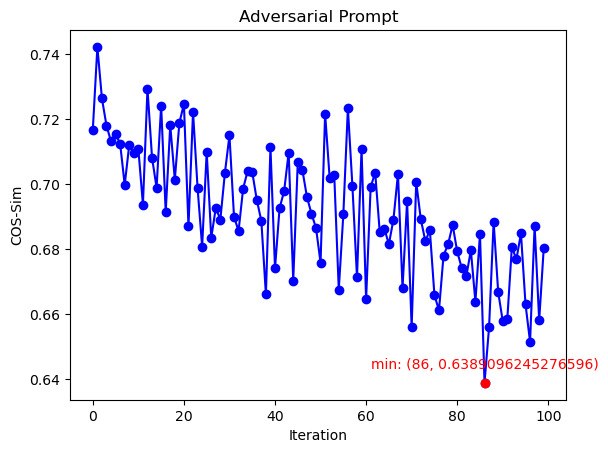

In [5]:
#Attack
from attack import search_min_sentence_iteration, genetic, PGDattack, get_char_table, train

def getPromptByPGD():
    #  PGD
    prompts = []
    min_tensor, loss_list, pgd_prompt, min_loss = train(init_per_sample=1, sentence=attack_sentence,
                                                        len_prompt=len_prompt, char_list=char_table,
                                                        model=text_encoder.text_model, iter_num=100,
                                                        eta_u=1, tokenizer=tokenizer, text_encoder=text_encoder)
    pgd_sentence = attack_sentence + ' ' + pgd_prompt
    # assuming loss_list is your list of losses
    
    loss_list = [x.item() for x in loss_list]

    loss_list = np.asarray(loss_list)
    loss_list = np.ones_like(loss_list) / loss_list
    
    # Create a simple list
    data = loss_list

    # Create a simple line plot
    plt.plot(data, 'o-', color='blue')

    # Find the minimum point and its index
    ymin = np.min(data)
    xmin = np.argmin(data)

    # Highlight the minimum point with a red dot
    plt.plot(xmin, ymin, 'ro')

    # Annotate the minimum point
    plt.annotate('min: ({}, {})'.format(xmin, ymin), (xmin, ymin), textcoords="offset points", xytext=(0,10), ha='center', color='red')

    # Add labels and title
    plt.xlabel('Iteration')
    plt.ylabel('COS-Sim')
    plt.title('Adversarial Prompt')

    # Display the plot
    plt.show()
    return min_loss



min_loss = getPromptByPGD()
torch.cuda.empty_cache()